In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv("../../Data/Q4/retail.csv")
df

,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009/12/1 7:45,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009/12/1 7:45,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009/12/1 7:45,1.25,13085.0
...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Transaction_id  1000000 non-null  object 
 1   Product_id      1000000 non-null  object 
 2   Description     995669 non-null   object 
 3   Quantity        1000000 non-null  float64
 4   Date            1000000 non-null  object 
 5   Price           1000000 non-null  float64
 6   Customer ID     774502 non-null   float64
dtypes: float64(3), object(4)
memory usage: 56.0+ MB


## Statistic

In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1000000.000000,1000000.000000,774502.000000
mean,10.053332,4.669050,15325.209913
std,136.005474,125.621421,1694.663838
min,-74215.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.100000,15262.000000
75%,10.000000,4.150000,16794.000000
max,74215.000000,38970.000000,18287.000000


### Missing Value Detection

In [5]:
df.isna().any()

Transaction_id    True
Product_id        True
Description       True
Quantity          True
Date              True
Price             True
Customer ID       True
dtype: bool

In [6]:
df.dropna(inplace=True, axis=0)

### Remove Anomaly Value

In [7]:
df = df[df.loc[:, "Price"] > 0]
df = df[df.loc[:, "Quantity"] > 0]

In [8]:
df.describe()

,Quantity,Price,Customer ID
count,756531.000000,756531.000000,756531.000000
mean,13.378881,3.231976,15332.616078
std,115.017471,29.972501,1693.957022
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13979.000000
50%,5.000000,1.950000,15272.000000
75%,12.000000,3.750000,16798.000000
max,74215.000000,10953.500000,18287.000000


## Visualization

### Customer Purchasing Behavior:
- **Identify the top 10 customers with the highest transaction amounts**
- **Bar chart showing the top customers and their transaction amounts**

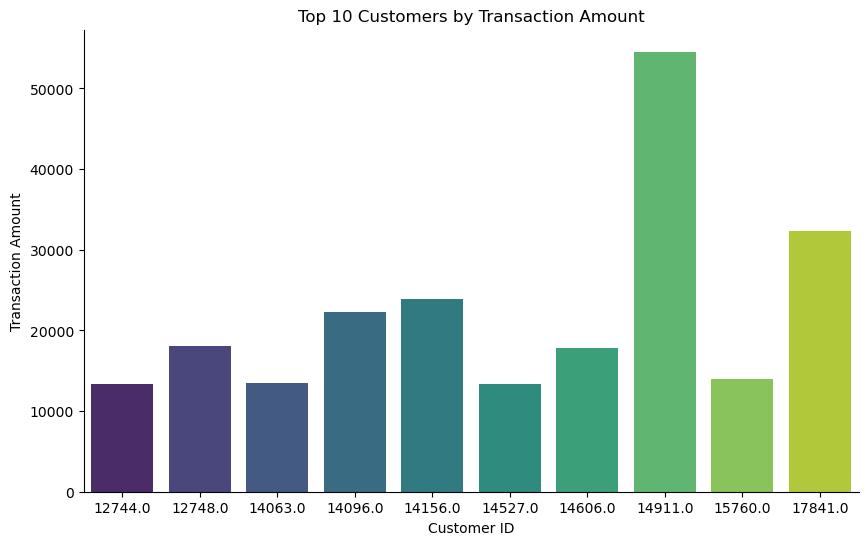

In [9]:
# Customer Purchasing Behavior
top_customers = df.groupby('Customer ID')['Price'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="viridis")
plt.title("Top 10 Customers by Transaction Amount")
plt.xlabel("Customer ID")
plt.ylabel("Transaction Amount")
sns.despine()
plt.show()

### Product Performance:
- **Determine the best-selling products in terms of quantity**
- **Visualization: Bar chart showing the top-selling products**

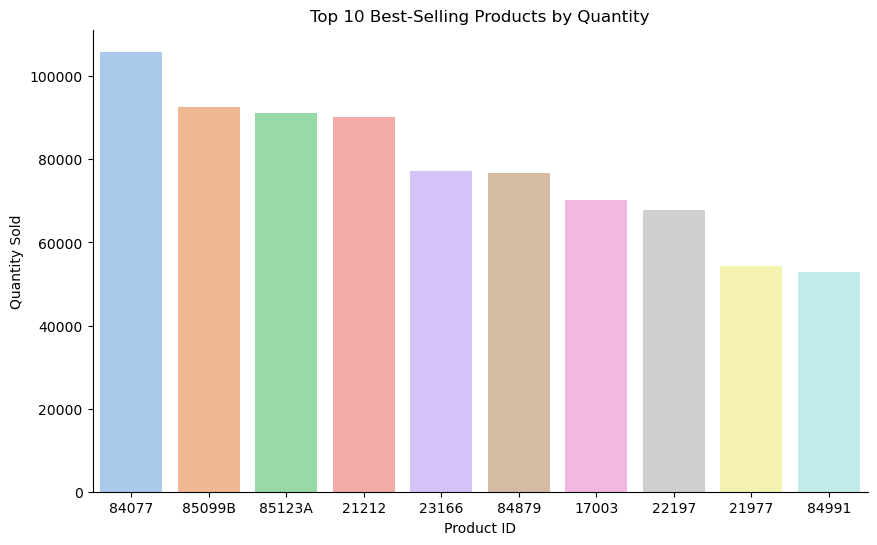

In [10]:
#  Product Performance
top_products = df.groupby('Product_id')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="pastel")
plt.title("Top 10 Best-Selling Products by Quantity")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
sns.despine()
plt.show()

### Seasonal Trends:

- **Explore seasonal variations in sales by analyzing transaction dates**
- **Time series plot showing monthly sales trends**

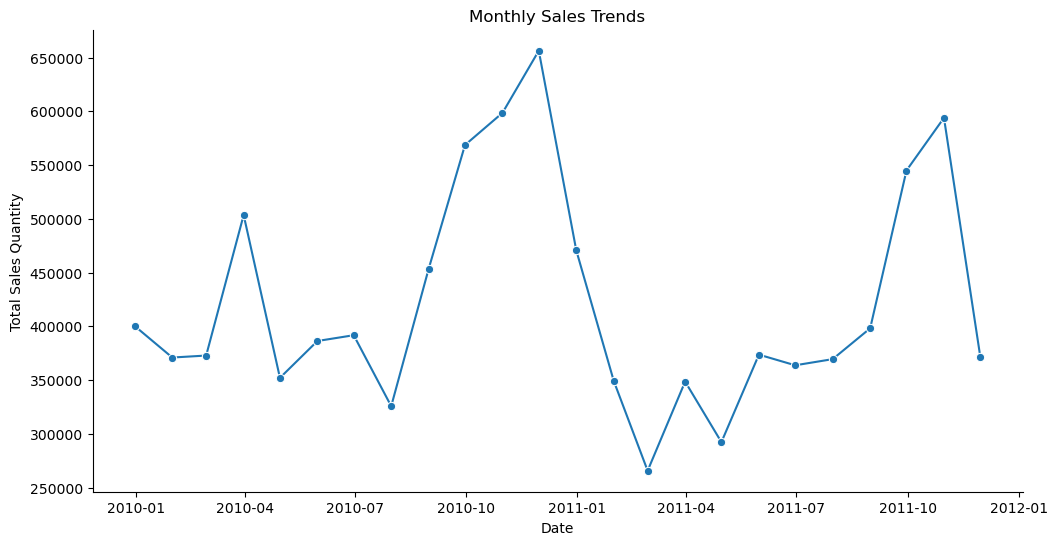

In [11]:
#  Seasonal Trends
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.resample('M', on='Date')['Quantity'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales Quantity")
sns.despine()
plt.show()

### Pricing Analysis:

- **Examine the distribution of product prices**
- **Visualization: Histogram of product prices**

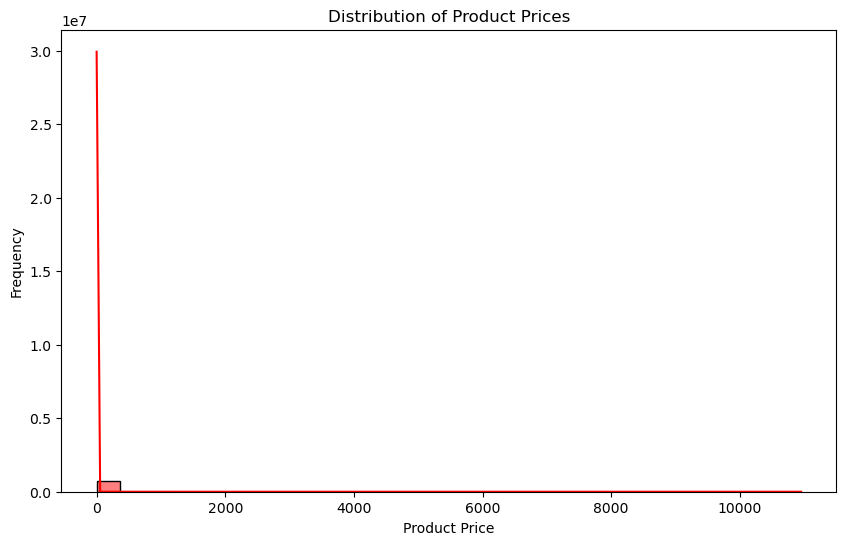

In [12]:
#  Pricing Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='red')
plt.title("Distribution of Product Prices")
plt.xlabel("Product Price")
plt.ylabel("Frequency")
plt.show()

### Quantity vs. Price Analysis:

- **Explore the relationship between product quantity and price**
- **Visualization: Scatter plot of quantity vs. price**

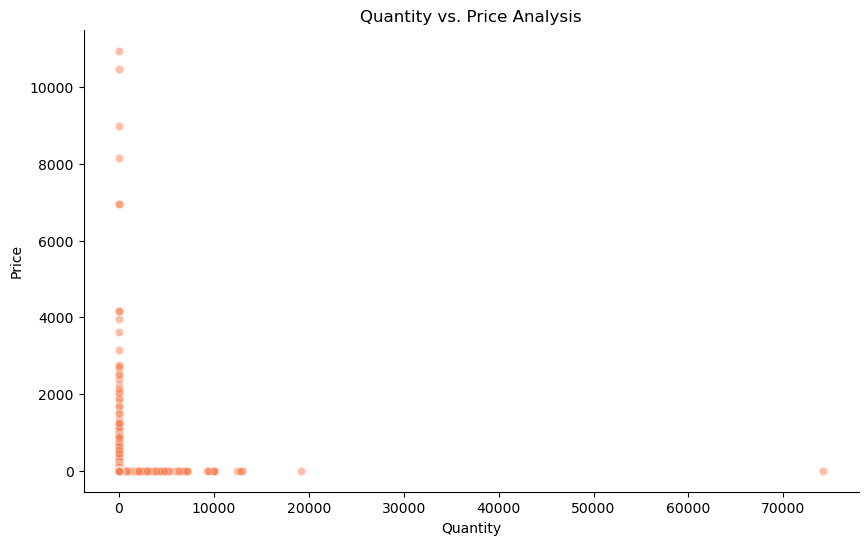

In [13]:
#  Quantity vs. Price Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', data=df, alpha=0.5, color='coral')
plt.title("Quantity vs. Price Analysis")
plt.xlabel("Quantity")
plt.ylabel("Price")
sns.despine()
plt.show()

### Repeat Customer Analysis:

- **Analyze the percentage of repeat customers**
- **Visualization: Pie chart or bar chart showing the distribution of repeat and one-time customers**

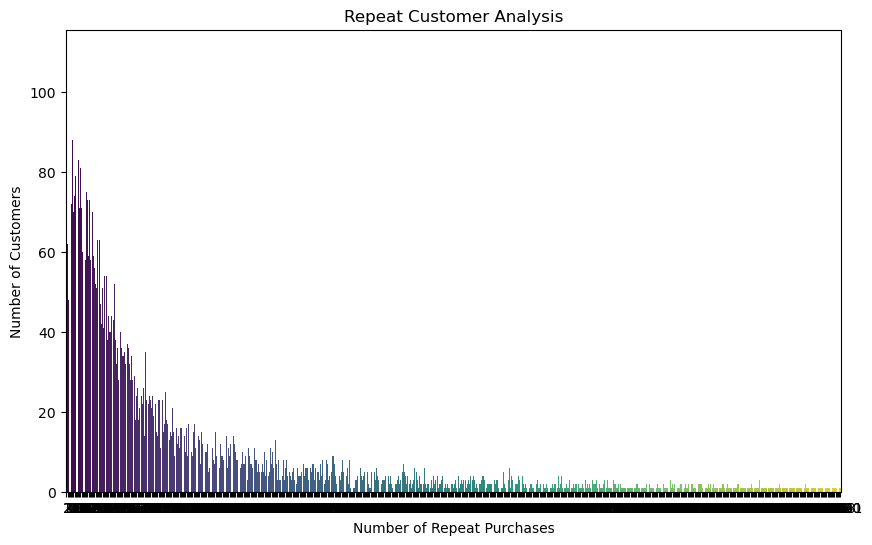

In [14]:
# Repeat Customer Analysis
repeat_customers = df['Customer ID'].value_counts().value_counts().reset_index().rename(columns={'index': 'Repeat Purchases', 'Customer ID': 'Customers'})
plt.figure(figsize=(10, 6))
sns.barplot(x=repeat_customers['Repeat Purchases'], y=repeat_customers['Customers'], palette="viridis")
plt.title("Repeat Customer Analysis")
plt.xlabel("Number of Repeat Purchases")
plt.ylabel("Number of Customers")
plt.show()

### Time-of-Day Analysis:

- **Investigate the time-of-day patterns in transactions**
- **Line showing transaction counts by time of day**

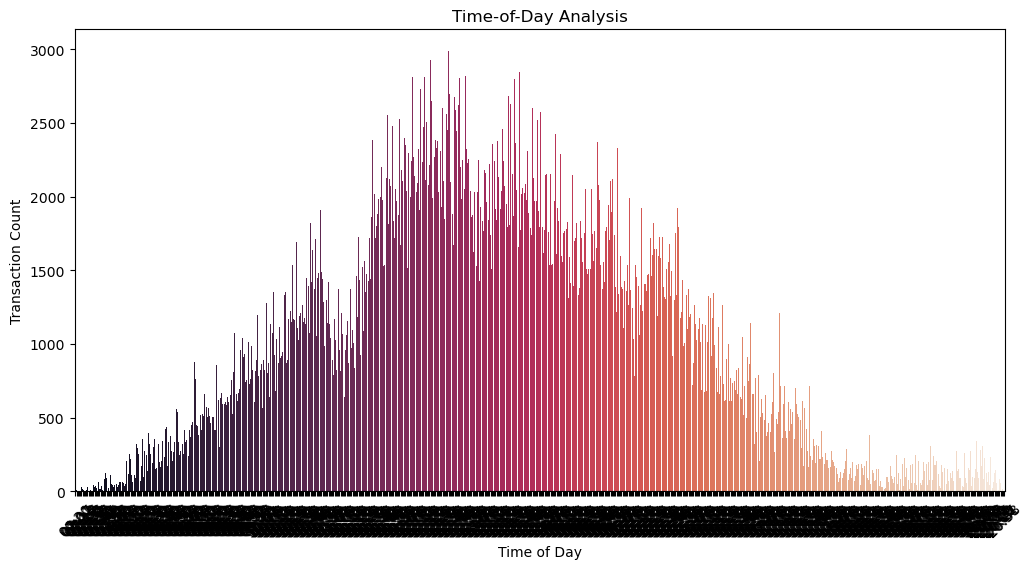

In [15]:
df['Time'] = pd.to_datetime(df['Date']).dt.time
time_of_day_counts = df.groupby(df['Time'].apply(lambda x: x.strftime('%H:%M'))).size().reset_index(name='Transaction Count')
plt.figure(figsize=(12, 6))
sns.barplot(x=time_of_day_counts['Time'], y=time_of_day_counts['Transaction Count'], palette="rocket")
plt.title("Time-of-Day Analysis")
plt.xlabel("Time of Day")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

### Sales Contribution by Product:

- **Identify the top products contributing the most to overall sales**
- **Bar chart showing the sales contribution of the top products**

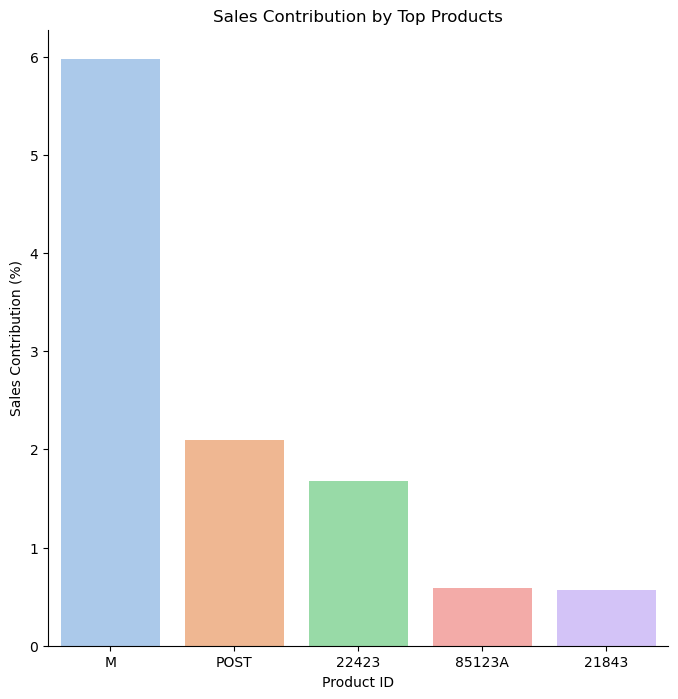

In [16]:
# Sales Contribution by Product
top_products_contribution = df.groupby('Product_id')['Price'].sum().nlargest(5) / df['Price'].sum() * 100
plt.figure(figsize=(8, 8))
sns.barplot(x=top_products_contribution.index, y=top_products_contribution.values, palette="pastel")
plt.title("Sales Contribution by Top Products")
plt.xlabel("Product ID")
plt.ylabel("Sales Contribution (%)")
sns.despine()
plt.show()

### Customer Loyalty Analysis:

- Explore customer loyalty by analyzing the frequency of repeat purchases.
- Histogram showing the distribution of repeat purchase frequencies.

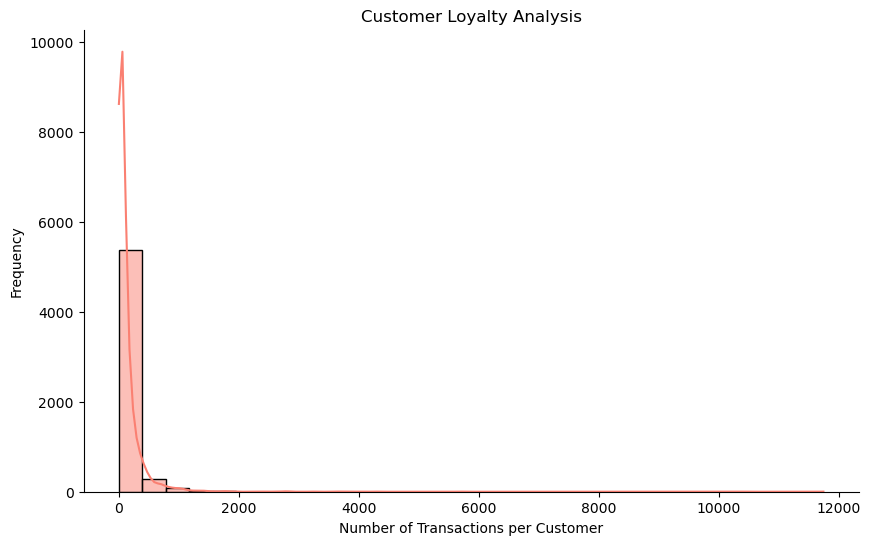

In [17]:
# Customer Loyalty Analysis
customer_purchase_frequency = df.groupby('Customer ID')['Transaction_id'].count()
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_frequency, bins=30, kde=True, color='salmon')
plt.title("Customer Loyalty Analysis")
plt.xlabel("Number of Transactions per Customer")
plt.ylabel("Frequency")
sns.despine()
plt.show()

### Seasonal Product Preferences:

- **Analyze whether certain products are more popular during specific seasons**
- **Heatmap or grouped bar chart showing product sales across different seasons**

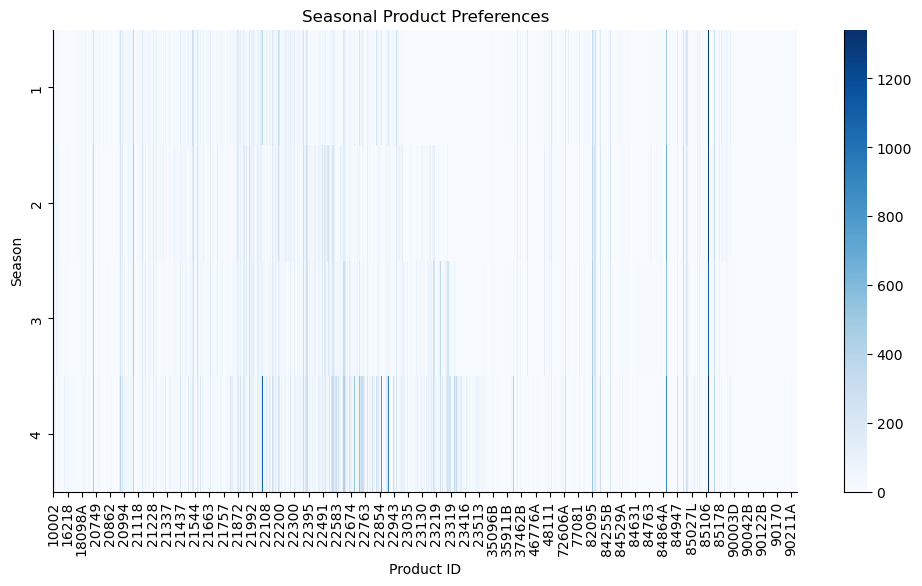

In [18]:
# Seasonal Product Preferences
df['Season'] = df['Date'].dt.month % 12 // 3 + 1  # Assuming 4 seasons
seasonal_product_sales = df.groupby(['Season', 'Product_id']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_product_sales, cmap="Blues")
plt.title("Seasonal Product Preferences")
plt.xlabel("Product ID")
plt.ylabel("Season")
sns.despine()
plt.show()

In [19]:
grouped_products = df.groupby('Transaction_id')['Product_id'].apply(list).reset_index(name='items')
grouped_products

,Transaction_id,items
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2..."
1,489435,"[22350, 22349, 22195, 22353]"
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22..."
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213..."
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214..."
...,...,...
34879,576832,"[22630, 23497, 23526, 23084, 23318, 22738, 229..."
34880,576833,"[21108, 22098, 22269, 22266, 22286, 22287, 850..."
34881,576834,"[23130, 22197, 22909, 22086, 23110, 79321, 231..."
34882,576836,"[22086, 23567, 22192, 23341, 23342, 22248, 227..."
